In [18]:
%matplotlib notebook

[50000, 52430.42550361523, 55422.24341298752, 58570.106120557066, 61839.291665789126, 65299.9779227149, 68943.93230118704, 72585.63928759204, 76420.27154077415, 80473.59890602216, 84316.65389950816, 88794.84944783508, 93186.82928108535, 97423.56064911209, 102306.01038517653, 107132.27798485522, 112030.52171932346, 117116.40847032263, 122437.79681389716, 127788.33860547765, 133277.9744928511, 139129.2468711987, 145029.14685371844, 150477.23254134963, 156540.2291247411, 162911.7227661407, 165822.06493997146, 168506.22969109402, 170752.8556370749, 173151.5207229147, 176186.7972829517, 178385.30815144748, 181034.7707748944, 183622.5709393123, 186557.81002779087, 190563.68376664104, 192695.96477136787, 195791.6305720325, 197481.31641429802, 200201.76487031192, 203892.90858060063, 206430.4601535348, 209669.18865986192, 212428.32127705513, 216074.53329659472, 219147.51804618267]


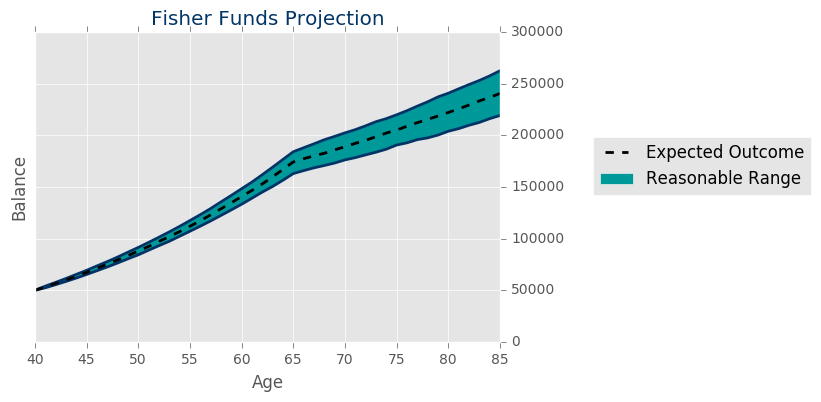

In [4]:
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np
from operator import itemgetter
plt.style.use('ggplot')

def Projection(Balance,Age,PIR,Salary,cont_rate,Strategy,ret_inc,ret_str):
    Balance = int(Balance)
    ret_age = 65
    ages = [n for n in range(Age,86)]
    starting_sal = [int(Salary)]
    for i in range(Age,64):
        starting_sal.append(starting_sal[-1]*1.02)
    overall = []
    for i in range(1000):
        balances = [Balance]
        for j in range(len(starting_sal)):
            if balances[-1] > 0:
                ret = np.random.normal(Strategy[0],Strategy[1])
                if starting_sal[j] * cont_rate >= 1042.86: 
                    balances.append((balances[-1]*(1+(ret*(1-PIR)/100))) + starting_sal[j] * cont_rate + 521.46)
                else:
                    balances.append((balances[-1]*(1+(ret*(1-PIR)/100))) + starting_sal[j] * cont_rate + (starting_sal[j] * cont_rate)/2)
            else:
                balances.append(0)
        for j in range(65,85):
            if balances[-1] > 0:
                ret = np.random.normal(ret_str[0],ret_str[1])
                balances.append((balances[-1] - ret_inc) * (1+(ret*(1-PIR)/100)))
            else:
                balances.append(0)
        overall.append(balances)
    lowest = []
    highest = []
    middle = []
    for i in range(len(ages)):
        sorted_list = sorted(overall, key = lambda x: x[i])
        lowest.append(sorted_list[200][i])
        highest.append(sorted_list[800][i])
        middle.append(sorted_list[500][i])
#     print(len(sorted_list))
#     print("Your expected value at the age of retirment ("+str(ret_age)+") is $" +str(int(middle[-1])))
#     print(len(ages)+1)
    fig, ax = plt.subplots(1)
    ax.plot(ages, lowest, color = '#003366', lw = 2.0)
    ax.plot(ages, highest, color = '#003366', lw = 2.0)
    ax.plot(ages, middle, label = 'Expected Outcome', color = '#000000', ls = 'dashed', lw = 2.0)
    ax.fill_between(ages, lowest, highest, alpha = 1.0, label = "Reasonable Range", facecolor = "#009999")
    plt.legend(bbox_to_anchor=(1.2, 0.66), loc=2, borderaxespad=0.)
    ax.set_xlabel("Age")
    ax.set_ylabel("Balance")
    ax.yaxis.tick_right()
    plt.title("Fisher Funds Projection", color = "#003366")
    plt.xlim(Age,85)
    plt.ylim(0,)
    plt.show()
        
  
interact(Projection, Strategy= widgets.Dropdown(options={'Conservative': (2,2),'Balanced':(5,5),'Growth':(7,12)},value=(7,12)), 
         Age = widgets.IntSlider(min=0,max=64,step=1,value=50,continuous_update=False, slider_color = "#003366", width = "70%"),
        Balance = widgets.Text("0", description = "Balance"),
        ret_inc = widgets.IntSlider(min=0,max=250000,step=1000,value=0,continuous_update=False,description = 'Retirement Income',
                                    slider_color = "#003366", width = "70%"),
        ret_str = widgets.Dropdown(options={'Conservative': (2,2),'Balanced':(5,5),'Growth':(7,12)},description='Retirement Strategy',value=(2,2)),
        PIR = widgets.Dropdown(options={'Low (10.5%)': (.105),'Mid (17.5%)':(0.175),'High (28%)':(0.28),'No Tax (0%)':(0)},description='PIR',value=(0))
        ,Salary = widgets.Text("0", description = "Salary", continuous_update=False),
        cont_rate = widgets.Dropdown(options={'3%': (0.03),'4%':(0.04),'8%':(0.08)},description='Contribution Rate',value=(0.03)));

